In [1]:
from stats_can import StatsCan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#seaborn theme
import seaborn as sns
sns.set()

In [2]:
sc = StatsCan()

In [3]:
df = sc.table_to_df('14-10-0294-02')

In [4]:
df

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2001-03-01,Canada,2016A000011124,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91445764,1.1.1.1,24281.3,NaN,NaN,NaN,1
1,2001-03-01,Canada,2016A000011124,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91445765,1.1.1.2,24281.3,NaN,NaN,NaN,1
2,2001-03-01,Canada,2016A000011124,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91445766,1.2.1.1,16010.7,NaN,NaN,NaN,1
3,2001-03-01,Canada,2016A000011124,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91445767,1.2.1.2,15758.5,NaN,NaN,NaN,1
4,2001-03-01,Canada,2016A000011124,Labour force,Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101896490,1.2.2.1,33.0,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334139,2020-01-01,"Victoria, British Columbia",2011S0503935,Employment rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446406,46.7.1.1,62.1,NaN,NaN,NaN,1
334140,2020-01-01,"Victoria, British Columbia",2011S0503935,Employment rate,Estimate,Unadjusted,Percentage,242,units,0,v91446407,46.7.1.2,61.1,NaN,NaN,NaN,1
334141,2020-01-01,"Victoria, British Columbia",2011S0503935,Employment rate,Standard error of estimate,Seasonally adjusted,Percentage,242,units,0,v101897315,46.7.2.1,1.7,NaN,NaN,NaN,1
334142,2020-01-01,"Victoria, British Columbia",2011S0503935,Employment rate,Standard error of month-to-month change,Seasonally adjusted,Percentage,242,units,0,v101897316,46.7.3.1,0.5,NaN,NaN,NaN,1


In [7]:
calgary = df[df['GEO']=="Calgary, Alberta"]

In [8]:
calgary

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1248,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446310,40.1.1.1,769.0,NaN,NaN,NaN,1
1249,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91446311,40.1.1.2,769.0,NaN,NaN,NaN,1
1250,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446312,40.2.1.1,575.1,NaN,NaN,NaN,1
1251,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91446313,40.2.1.2,567.5,NaN,NaN,NaN,1
1252,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101897192,40.2.2.1,8.3,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333947,2020-01-01,"Calgary, Alberta",2011S0503825,Employment rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446322,40.7.1.1,66.8,NaN,NaN,NaN,1
333948,2020-01-01,"Calgary, Alberta",2011S0503825,Employment rate,Estimate,Unadjusted,Percentage,242,units,0,v91446323,40.7.1.2,66.4,NaN,NaN,NaN,1
333949,2020-01-01,"Calgary, Alberta",2011S0503825,Employment rate,Standard error of estimate,Seasonally adjusted,Percentage,242,units,0,v101897207,40.7.2.1,1.0,NaN,NaN,NaN,1
333950,2020-01-01,"Calgary, Alberta",2011S0503825,Employment rate,Standard error of month-to-month change,Seasonally adjusted,Percentage,242,units,0,v101897208,40.7.3.1,0.3,NaN,NaN,NaN,1


In [9]:
calgary['Statistics'].unique()

[Estimate, Standard error of estimate, Standard error of month-to-month change, Standard error of year-over-year change]
Categories (4, object): [Estimate, Standard error of estimate, Standard error of month-to-month change, Standard error of year-over-year change]

In [10]:
cal_est = calgary[calgary['Statistics']=='Estimate']

In [11]:
cal_est

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
1248,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446310,40.1.1.1,769.0,NaN,NaN,NaN,1
1249,2001-03-01,"Calgary, Alberta",2011S0503825,Population,Estimate,Unadjusted,Persons,249,thousands,3,v91446311,40.1.1.2,769.0,NaN,NaN,NaN,1
1250,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446312,40.2.1.1,575.1,NaN,NaN,NaN,1
1251,2001-03-01,"Calgary, Alberta",2011S0503825,Labour force,Estimate,Unadjusted,Persons,249,thousands,3,v91446313,40.2.1.2,567.5,NaN,NaN,NaN,1
1255,2001-03-01,"Calgary, Alberta",2011S0503825,Employment,Estimate,Seasonally adjusted,Persons,249,thousands,3,v91446314,40.3.1.1,546.7,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333938,2020-01-01,"Calgary, Alberta",2011S0503825,Unemployment rate,Estimate,Unadjusted,Percentage,242,units,0,v91446319,40.5.1.2,7.1,NaN,NaN,NaN,1
333942,2020-01-01,"Calgary, Alberta",2011S0503825,Participation rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446320,40.6.1.1,72.0,NaN,NaN,NaN,1
333943,2020-01-01,"Calgary, Alberta",2011S0503825,Participation rate,Estimate,Unadjusted,Percentage,242,units,0,v91446321,40.6.1.2,71.5,NaN,NaN,NaN,1
333947,2020-01-01,"Calgary, Alberta",2011S0503825,Employment rate,Estimate,Seasonally adjusted,Percentage,242,units,0,v91446322,40.7.1.1,66.8,NaN,NaN,NaN,1


In [12]:
#filter out non relevant information
cal_est = cal_est.filter(items = ['REF_DATE','Labour force characteristics','Data type','UOM', 'VALUE'])

In [13]:
cal_est

,REF_DATE,Labour force characteristics,Data type,UOM,VALUE
1248,2001-03-01,Population,Seasonally adjusted,Persons,769.0
1249,2001-03-01,Population,Unadjusted,Persons,769.0
1250,2001-03-01,Labour force,Seasonally adjusted,Persons,575.1
1251,2001-03-01,Labour force,Unadjusted,Persons,567.5
1255,2001-03-01,Employment,Seasonally adjusted,Persons,546.7
...,...,...,...,...,...
333938,2020-01-01,Unemployment rate,Unadjusted,Percentage,7.1
333942,2020-01-01,Participation rate,Seasonally adjusted,Percentage,72.0
333943,2020-01-01,Participation rate,Unadjusted,Percentage,71.5
333947,2020-01-01,Employment rate,Seasonally adjusted,Percentage,66.8


In [15]:
cal_unadj = cal_est[(cal_est['UOM']=='Persons') & (cal_est['Data type']=='Unadjusted')]

In [20]:
cal_pivot = cal_unadj.pivot(index='REF_DATE', columns = 'Labour force characteristics',values ='VALUE')
cal_pivot

Labour force characteristics,Population,Labour force,Employment,Unemployment
REF_DATE,,,,
2001-03-01,769.0,567.5,540.0,27.5
2001-04-01,771.1,570.8,544.3,26.5
2001-05-01,773.2,577.3,552.4,24.9
2001-06-01,775.4,588.7,565.0,23.7
2001-07-01,777.6,599.3,572.8,26.5
...,...,...,...,...
2019-09-01,1278.0,952.2,881.5,70.7
2019-10-01,1280.8,944.7,873.0,71.7
2019-11-01,1283.6,937.6,872.3,65.2


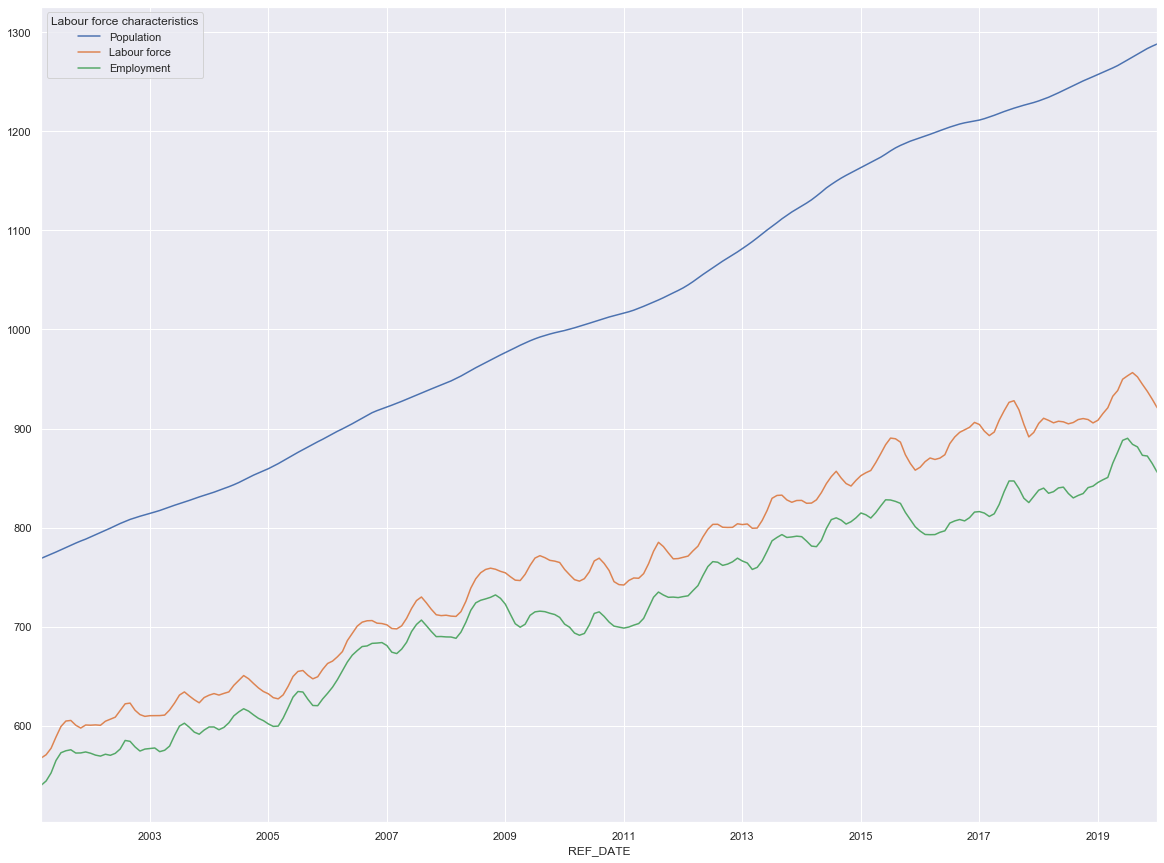

In [27]:
cal_pivot[['Population','Labour force', 'Employment']].plot(figsize = (20,15),kind='line')